In [2]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/tl3538/CE-UY_3013_Fall2024/refs/heads/main/spotify52kData%20(1)%20(1).csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   songNumber        52000 non-null  int64  
 1   artists           52000 non-null  object 
 2   album_name        52000 non-null  object 
 3   track_name        52000 non-null  object 
 4   popularity        52000 non-null  int64  
 5   duration          52000 non-null  int64  
 6   explicit          52000 non-null  bool   
 7   danceability      52000 non-null  float64
 8   energy            52000 non-null  float64
 9   key               52000 non-null  int64  
 10  loudness          52000 non-null  float64
 11  mode              52000 non-null  int64  
 12  speechiness       52000 non-null  float64
 13  acousticness      52000 non-null  float64
 14  instrumentalness  52000 non-null  float64
 15  liveness          52000 non-null  float64
 16  valence           52000 non-null  float6

In [3]:
df.describe()

,songNumber,popularity,duration,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,52000.000000,52000.000000,5.200000e+04,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000
mean,25999.500000,33.115923,2.302998e+05,0.563900,0.668259,5.348442,-7.972804,0.622904,0.095864,0.271442,0.182884,0.212527,0.451814,123.558120,3.916308
std,15011.251336,21.743697,1.176823e+05,0.176573,0.249585,3.562600,4.919127,0.484664,0.131501,0.322322,0.325275,0.187986,0.255314,29.242142,0.400671
min,0.000000,0.000000,1.745300e+04,0.000000,0.000020,0.000000,-42.044000,0.000000,0.000000,0.000000,0.000000,0.011200,0.000000,0.000000,0.000000
25%,12999.750000,18.000000,1.739470e+05,0.447000,0.508000,2.000000,-9.578000,0.000000,0.036800,0.007260,0.000000,0.097200,0.238000,100.979000,4.000000
50%,25999.500000,33.000000,2.135460e+05,0.574000,0.717000,6.000000,-6.696000,1.000000,0.051200,0.106000,0.000161,0.132000,0.431000,123.366000,4.000000
75%,38999.250000,50.000000,2.651962e+05,0.696000,0.877000,9.000000,-4.849000,1.000000,0.093000,0.499000,0.168000,0.275000,0.653000,141.944000,4.000000
max,51999.000000,100.000000,4.789026e+06,0.983000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,0.997000,0.995000,0.995000,243.372000,5.000000


In [4]:
import numpy as np

outliers = df[(np.abs(df['loudness'] - df['loudness'].mean()) > (2.5 * df['loudness'].std()))|
(np.abs(df['tempo'] - df['tempo'].mean()) > (2.5 * df['tempo'].std()))
]

len(outliers)

2146

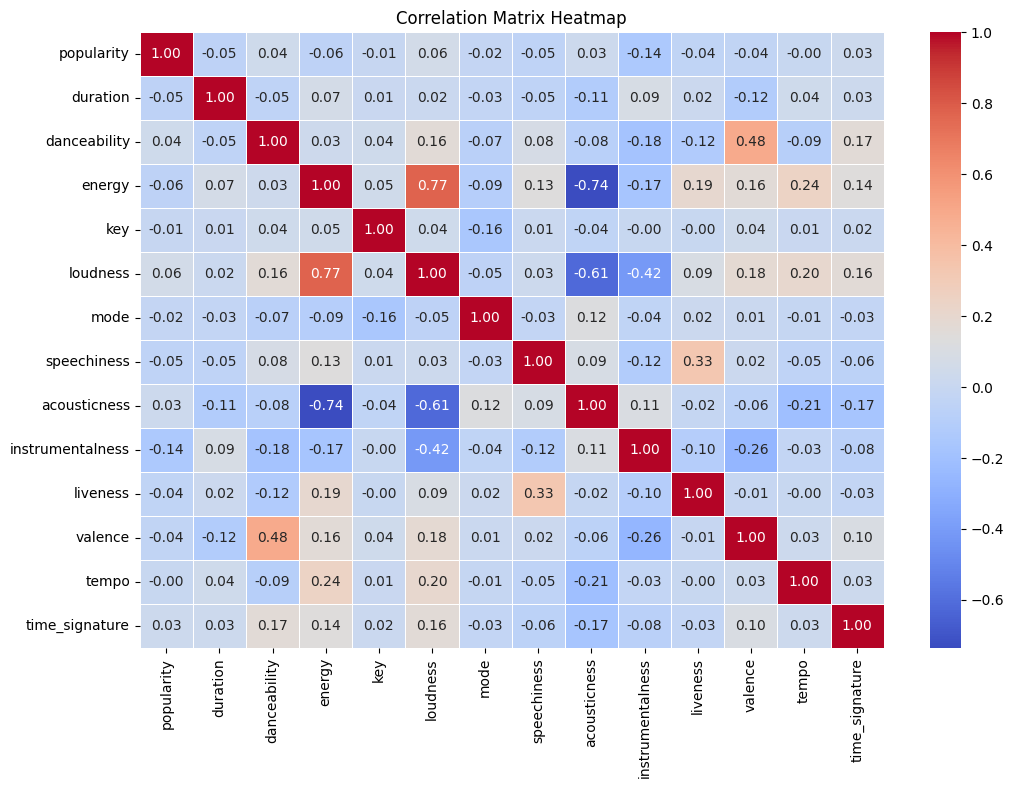

In [5]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/tl3538/CE-UY_3013_Fall2024/refs/heads/main/spotify52kData%20(1)%20(1).csv')
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = df.drop(columns=['songNumber']).select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix Heatmap")
plt.show()


In [6]:
df_dropna = df.dropna()
df_dropna.info()
df.duplicated().value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   songNumber        52000 non-null  int64  
 1   artists           52000 non-null  object 
 2   album_name        52000 non-null  object 
 3   track_name        52000 non-null  object 
 4   popularity        52000 non-null  int64  
 5   duration          52000 non-null  int64  
 6   explicit          52000 non-null  bool   
 7   danceability      52000 non-null  float64
 8   energy            52000 non-null  float64
 9   key               52000 non-null  int64  
 10  loudness          52000 non-null  float64
 11  mode              52000 non-null  int64  
 12  speechiness       52000 non-null  float64
 13  acousticness      52000 non-null  float64
 14  instrumentalness  52000 non-null  float64
 15  liveness          52000 non-null  float64
 16  valence           52000 non-null  float6

,count
False,52000


In [7]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df['artists'] = label_encoder.fit_transform(df['artists'])
df['album_name'] = label_encoder.fit_transform(df['album_name'])
df['track_name'] = label_encoder.fit_transform(df['track_name'])
df['track_genre'] = label_encoder.fit_transform(df['track_genre'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   songNumber        52000 non-null  int64  
 1   artists           52000 non-null  int64  
 2   album_name        52000 non-null  int64  
 3   track_name        52000 non-null  int64  
 4   popularity        52000 non-null  int64  
 5   duration          52000 non-null  int64  
 6   explicit          52000 non-null  bool   
 7   danceability      52000 non-null  float64
 8   energy            52000 non-null  float64
 9   key               52000 non-null  int64  
 10  loudness          52000 non-null  float64
 11  mode              52000 non-null  int64  
 12  speechiness       52000 non-null  float64
 13  acousticness      52000 non-null  float64
 14  instrumentalness  52000 non-null  float64
 15  liveness          52000 non-null  float64
 16  valence           52000 non-null  float6

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
import pandas as pd

numerical_features = ['tempo', 'loudness', 'key', 'danceability', 'acousticness', 'valence', 'speechiness']
X = df[numerical_features]
y = df['energy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

selector = SelectKBest(score_func=f_regression, k=5)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

selected_indices = selector.get_support(indices=True)
selected_features_kbest = [numerical_features[i] for i in selected_indices]
print("Top 5 Selected Features:", selected_features_kbest)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=selected_features_kbest)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=selected_features_kbest)

print("\nNew Training DataFrame Shape:", X_train_scaled_df.shape)
print("New Testing DataFrame Shape:", X_test_scaled_df.shape)

Top 5 Selected Features: ['tempo', 'loudness', 'acousticness', 'valence', 'speechiness']

New Training DataFrame Shape: (41600, 5)
New Testing DataFrame Shape: (10400, 5)


In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


models = {
    'Linear Regression': LinearRegression(),
    'SVR': SVR(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

param_grids = {
    'SVR': {'C': [0.1, 1], 'kernel': ['linear', 'rbf'], 'gamma': ['scale']},
    'Random Forest': {'n_estimators': [50, 100], 'max_depth': [10, 20]},
    'Gradient Boosting': {'n_estimators': [100, 200], 'learning_rate': [0.1, 0.2]}
}

results = []
for name, model in models.items():
    print(f"Tuning {name}...")
    if name in param_grids:  # Perform hyperparameter tuning
        search = RandomizedSearchCV(
            model,
            param_distributions=param_grids[name],
            n_iter=3,  # Reduced iterations
            cv=2,  # Reduced folds
            random_state=42,
            n_jobs=2  # Use 2 cores
        )
        # Use a subset for debugging
        search.fit(X_train_scaled[:1000], y_train[:1000])
        best_model = search.best_estimator_
        print(f"Best Parameters for {name}: {search.best_params_}")
    else:  # Train default model
        best_model = model
        best_model.fit(X_train_scaled, y_train)


    y_pred = best_model.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append([name, rmse, mae, r2])

results_df = pd.DataFrame(results, columns=['Model', 'RMSE', 'MAE', 'R²'])
print("\nModel Performance:")
print(results_df)

Tuning Linear Regression...
Tuning SVR...
Best Parameters for SVR: {'kernel': 'rbf', 'gamma': 'scale', 'C': 1}
Tuning Random Forest...
Best Parameters for Random Forest: {'n_estimators': 100, 'max_depth': 10}
Tuning Gradient Boosting...
Best Parameters for Gradient Boosting: {'n_estimators': 100, 'learning_rate': 0.1}

Model Performance:
               Model      RMSE       MAE        R²
0  Linear Regression  0.128371  0.102636  0.733300
1                SVR  0.120694  0.093661  0.764245
2      Random Forest  0.116729  0.088954  0.779479
3  Gradient Boosting  0.114621  0.087835  0.787374



Best Performing Model: Linear Regression
RMSE: 0.13
MAE: 0.10
R²: 0.73


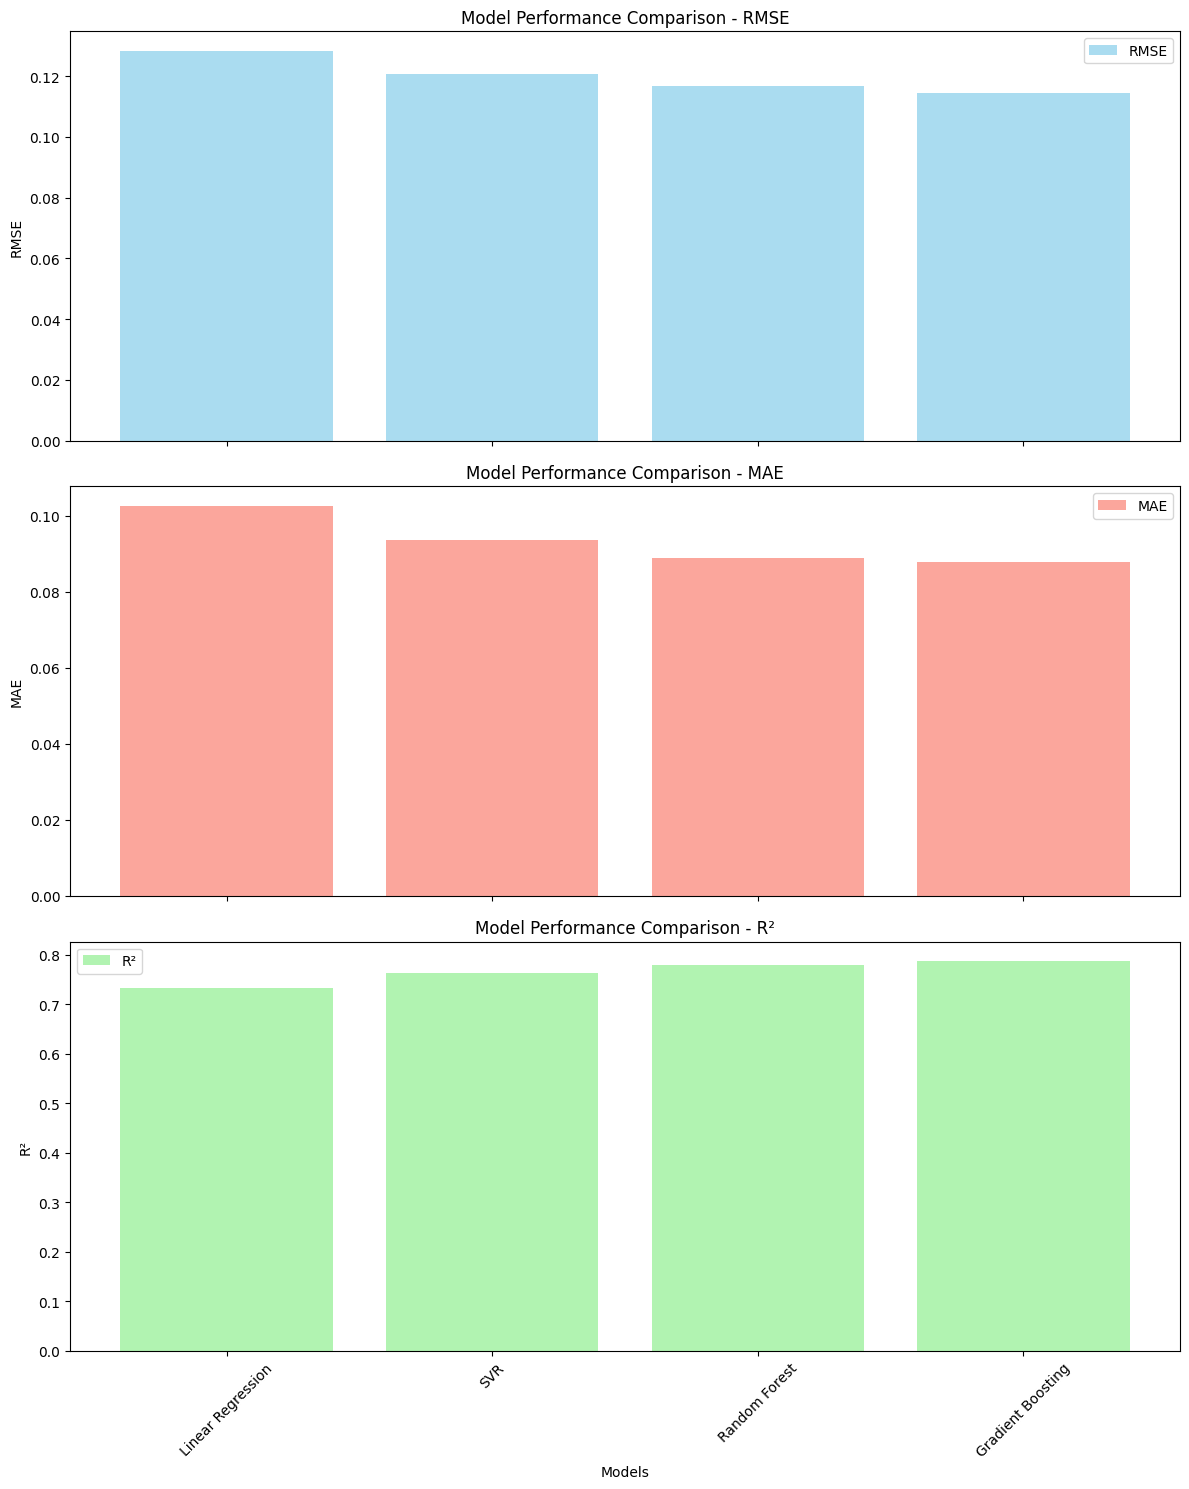

In [21]:
best_model_name = results_df.iloc[0]['Model']
best_model_rmse = results_df.iloc[0]['RMSE']
best_model_mae = results_df.iloc[0]['MAE']
best_model_r2 = results_df.iloc[0]['R²']

print(f"\nBest Performing Model: {best_model_name}")
print(f"RMSE: {best_model_rmse:.2f}")
print(f"MAE: {best_model_mae:.2f}")
print(f"R²: {best_model_r2:.2f}")

import matplotlib.pyplot as plt
fig, axes = plt.subplots(3, 1, figsize=(12, 15), sharex=True)

axes[0].bar(results_df['Model'], results_df['RMSE'], color='skyblue', alpha=0.7, label='RMSE')
axes[0].set_ylabel('RMSE')
axes[0].set_title('Model Performance Comparison - RMSE')
axes[0].legend()

axes[1].bar(results_df['Model'], results_df['MAE'], color='salmon', alpha=0.7, label='MAE')
axes[1].set_ylabel('MAE')
axes[1].set_title('Model Performance Comparison - MAE')
axes[1].legend()

axes[2].bar(results_df['Model'], results_df['R²'], color='lightgreen', alpha=0.7, label='R²')
axes[2].set_ylabel('R²')
axes[2].set_title('Model Performance Comparison - R²')
axes[2].legend()

plt.xticks(rotation=45)
plt.xlabel('Models')
plt.tight_layout()
plt.show()


In [21]:
import pandas as pd
import joblib

rf_model = joblib.load('best_energy_model.pkl')
scaler = joblib.load('scaler.pkl')

def get_input(prompt, input_type=float, range=None):
    while True:
        try:
            user_input = input_type(input(prompt))
            if range and not (range[0] <= user_input <= range[1]):
                print("Input must be between", range[0], "and", range[1], ". Try again.")
            else:
                return user_input
        except ValueError:
            print("Invalid input. Please enter a valid input.")

def predict_energy():

    print("Please enter the following details about the track:")

    tempo = get_input("Enter the tempo of the track (in beats per minute): ", float, range=(0, 300))
    loudness = get_input("Enter the loudness of the track (in dB): ", float, range=(-100, 0))
    key = get_input("Enter the musical key of the track (0 to 11): ", int, range=(0, 11))
    danceability = get_input("Enter the danceability of the track (0 to 1): ", float, range=(0, 1))
    acousticness = get_input("Enter the acousticness of the track (0 to 1): ", float, range=(0, 1))
    valence = get_input("Enter the valence of the track (0 to 1): ", float, range=(0, 1))
    speechiness = get_input("Enter the speechiness of the track (0 to 1): ", float, range=(0, 1))

    input_data = pd.DataFrame([[tempo, loudness, key, danceability, acousticness, valence, speechiness]],
                              columns=['tempo', 'loudness', 'key', 'danceability', 'acousticness', 'valence', 'speechiness'])

    input_data = input_data[['tempo', 'loudness', 'key', 'danceability', 'acousticness', 'valence', 'speechiness']]

    input_scaled = scaler.transform(input_data)

    energy_prediction = rf_model.predict(input_scaled)

    print('The predicted energy of the track is:', round(energy_prediction[0], 2))
    if energy_prediction[0] > 0.5:
        print("This track is high-energy!")
    else:
        print("This track is low-energy!")

predict_energy()


FileNotFoundError: [Errno 2] No such file or directory: 'best_energy_model.pkl'